# DAV 5400 Module 4 Assignment

In [151]:
#Load the pandas library
import pandas as pd

# read contents of a csv file from GitHub into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/anagh3395/DAV5400/main/Module4/M4_Data.csv')
df

,TARGET,ID,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,Y,77,66,0,0,0,0,333.561114,264.721010,3
1,Y,159,45,1,3,3,1,394.735699,284.904978,39
2,Y,220,42,1,3,6,1,342.180990,1175.589721,27
3,Y,303,31,0,0,0,0,453.757916,242.341754,3
4,Y,306,62,0,0,0,0,384.577469,287.008370,3
...,...,...,...,...,...,...,...,...,...,...
11003,N,16793,33,1,3,3,1,302.380331,229.457986,27
11004,N,16794,23,0,0,0,0,316.268616,228.518505,3
11005,N,16798,23,1,3,3,1,385.871241,236.665515,27
11006,N,16800,32,1,3,3,1,317.578868,226.899614,15


#### Q1. What proportion of customers have an age of more than the average customer age but less than 56?

####  Logic

- Firstly we find the mean for the age column   

- Secondly we filter the dataframe according to the condition (age greater than average age and less than 56)

- Lastly we print length of the new dataframe and divide it by number of customers 


In [152]:
avg_age = df.loc[:,'age'].mean()
filtered_df = df[(df['age'] > avg_age) & (df['age'] < 56) ]
print(" Proportion of customers have an age more than avg but less than 56 \n",len(filtered_df)/len(df))

 Proportion of customers have an age more than avg but less than 56 
 0.3352107558139535


#### Q2.  How many customers that have purchased Product B have spent more on Product B than 1.5x the  median amount that customers typically spend on Product B?


####  Logic

- Firstly we find the median of the "turnover_B" column.  

- Secondly we filter the dataframe according to the condition (that it should be greater than 1.5 times median) and display the length .


In [153]:
median = df['turnover_B'].median()
print(len(df[(df['turnover_B'] > (median*1.5))]))

865


#### Q3. How many customers have spent more on Product B than they have on Product A?

In [154]:
#filter the dataframe to find the customers who have spent more on product B than on product A
#Print the length 
print(len(df[df['turnover_A'] < df['turnover_B'] ]))

756


#### Q4. How many customers have purchased either type 6 of Product A or type 9 of Product B?

In [155]:
#Filtering the rows based on the condition using the bitwise OR operator 
#Print the no of rows who satisfy the condition
print(len(df[(df['type_A'] == 6) | (df['type_B'] == 9) ]))

55


#### Q5. Which customer has attained the highest average amount of monthly spending (i.e., across all  products they have purchased from the company) during the time in which they have been a customer of the company?

####  Logic

- Firstly we add a column in dataframe known as "sum" which is customer's total spending amount 

- Secondly we add a column "sum_per_month" which is customer's total spending amount divided by number of months that have been in the company.


In [156]:
df['sum'] = (df['turnover_A'] + df['turnover_B'])
df['sum_per_month'] = df['sum']/df['lor_M']

####  Answer by providing the dataframe row index, customer ID, and the total number of months the  customer has been with the company, as well as that customer's total spending amount.

In [157]:
print(df[['ID','lor_M','sum']])

          ID  lor_M          sum
0         77      3   598.282125
1        159     39   679.640677
2        220     27  1517.770710
3        303      3   696.099670
4        306      3   671.585839
...      ...    ...          ...
11003  16793     27   531.838317
11004  16794      3   544.787121
11005  16798     27   622.536757
11006  16800     15   544.478483
11007  16801     39   554.657246

[11008 rows x 3 columns]


#### Finally, display the complete content of the dataframe row corresponding to the customer you have identified.


In [158]:
# We use the "idxmax" function to find the row whch contains the max sum_per_month value
df.loc[df['sum_per_month'].idxmax()]

TARGET                      N
ID                      16185
age                        72
prod_A                      0
type_A                      0
type_B                      3
prod_B                      1
turnover_A         308.011162
turnover_B        12249.08477
lor_M                      15
sum              12557.095932
sum_per_month      837.139729
Name: 10713, dtype: object

#### Q6. Make bar plots of the 'type_A' and ‘type_B’ data.

####  Logic

- We call the pandas plot function and pass two columns ('type_A' and type_B)

- Secondly we select kind as histogram and subplots as true (which will display them as two plots for the columns)


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

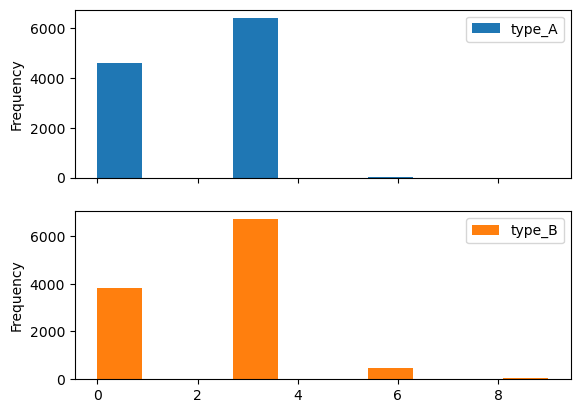

In [159]:
df[['type_A', 'type_B']].plot(kind = 'hist',subplots=True)

#### What do they tell us about the frequencies of the  individual type_A and type_B values within the data set?

#### Most of type_A products are 0 and 3 .  Most of the type_B products are 0 and 3  .

#### Q7.  Make boxplots of the 'age' attribute for each type of Product B

####  Logic

- We call the pandas assign function which assigns new columns to dataframe and we add each type of product B to it.

- We call the pivot function which will reshape the dataframe organised by certain columns.

- Finally we box plot for each type.


C:\Users\anag\AppData\Local\Temp\ipykernel_10092\1365547981.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df.assign(index=df.groupby('type_B').cumcount()).pivot('index','type_B','age').plot(kind='box')


<Axes: >

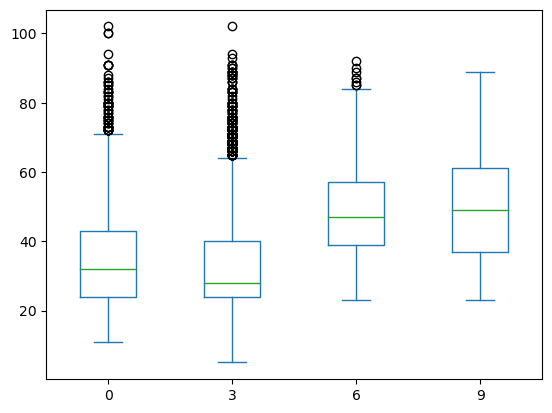

In [160]:
df.assign(index=df.groupby('type_B').cumcount()).pivot('index','type_B','age').plot(kind='box')

####  Discuss any conclusions you can  draw from the appearance of the boxplots regarding the ages of customers who purchase different types of Product B

#### We can see that for type_B 0 and 3 the age group is less (the median for first is 30 and for second is 25 approximately) and for type_B 6 and 9 the age group is more (median for first is 45 and 47 approximately)

#### Q8. Make histograms of the age and lor_M attributes, and boxplots of the turnover_A, and turnover_B attributes

<Axes: ylabel='Frequency'>

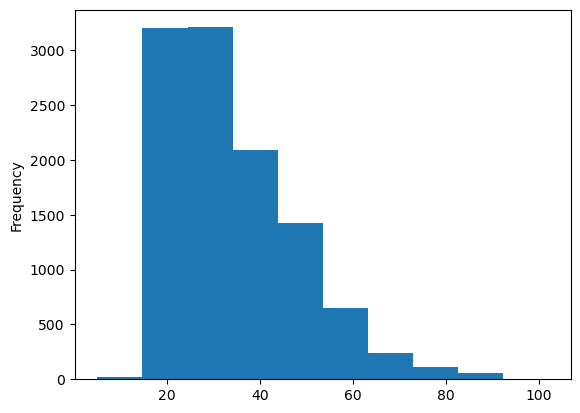

In [161]:
df['age'].plot(kind = 'hist')

#### This histogram shows that most of the age range is between 20 and 25 years approximately . There is a gradual decrease in the frequency as the age increases . This kind of is normal distribution.

<Axes: ylabel='Frequency'>

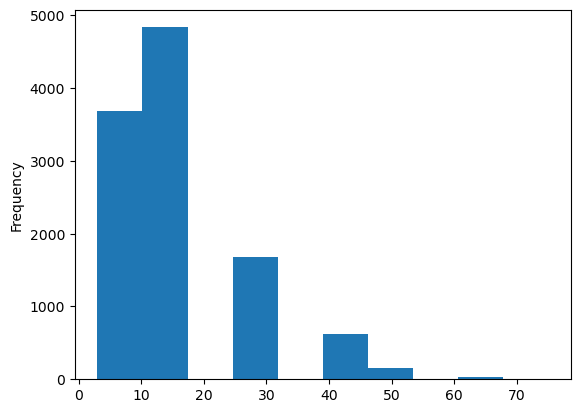

In [162]:
df['lor_M'].plot(kind = 'hist')

#### This histogram shows that most of the customer realationship with company falls mostly between 3 and 17 months approximately . Some customers have higher months relationship but its not a major percentage . The distribution is skewed. 

####  Logic

- We import the matplotlib library 

- We set the yaxis scale as 0 to 500 .(thats why imported the matplotlib)

- We plot the boxplots for the two columns


<Axes: >

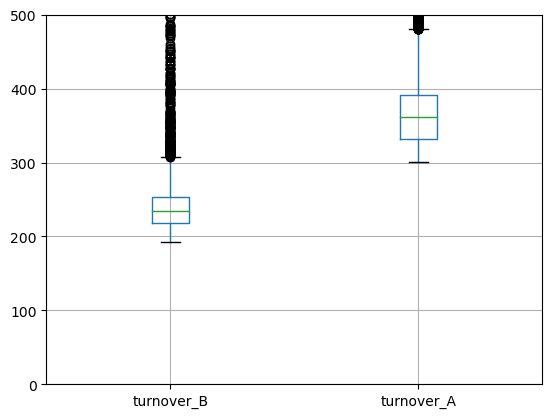

In [163]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_ylim(0,500)
df.boxplot(column=['turnover_B','turnover_A'],ax=ax)

#### The median is around 230 for turnover_B . Majority of values for turnover_B occur between 220 to 260 (approximately).The median is around 350 for turnover_A . Majority of values for turnover_A occur between 320 to 390 (approximately). Also the Interquartile range for turnover_A is more than turnover_B in length . Baically quartiles are more scattered for turnover_A

#### Q9.  Make a scatter plot of turnover_A vs. lor_M.

<Axes: xlabel='turnover_A', ylabel='lor_M'>

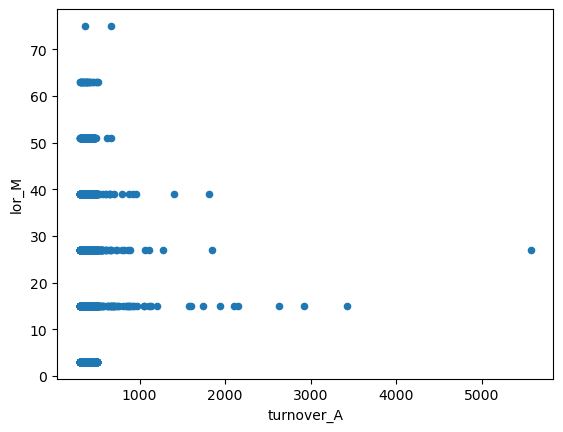

In [164]:
df.plot(kind='scatter', x='turnover_A', y='lor_M')

 #### What can we say about the relationship between those two attributes

#### Length of customer's relationship is kind of inversely proportional to turnover_A. For more lor_M the turnover_ A is less . For example for lor_M between 50 and 60 , the turnover_A is less than 300 .  If lor_M is moderate than turnover_A increases.